# Task 3: Customer Churn Prediction (Bank Customers)
# Dataset: 10k Bank Customers

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2️⃣ Load Dataset

In [5]:
data = pd.read_csv(r"G:\Documents\Internships Data\Developerhub\Task-3-Churn-prediction\Bank Customer Churn Prediction.csv")

In [6]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3️⃣ Inspect Dataset

In [7]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_nu

In [8]:
data.drop(columns=['customer_id'], inplace=True)

# 4️⃣ Encode Categorical Variables

In [9]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])  # Male=1, Female=0

# One-Hot Encode Country
data = pd.get_dummies(data, columns=['country'], drop_first=True)

# 5️⃣ Exploratory Data Analysis (EDA)

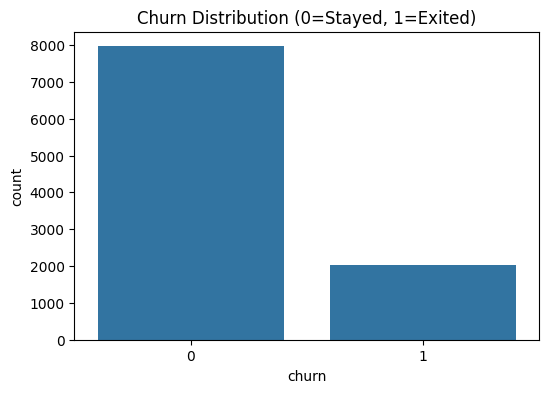

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution (0=Stayed, 1=Exited)')
plt.show()

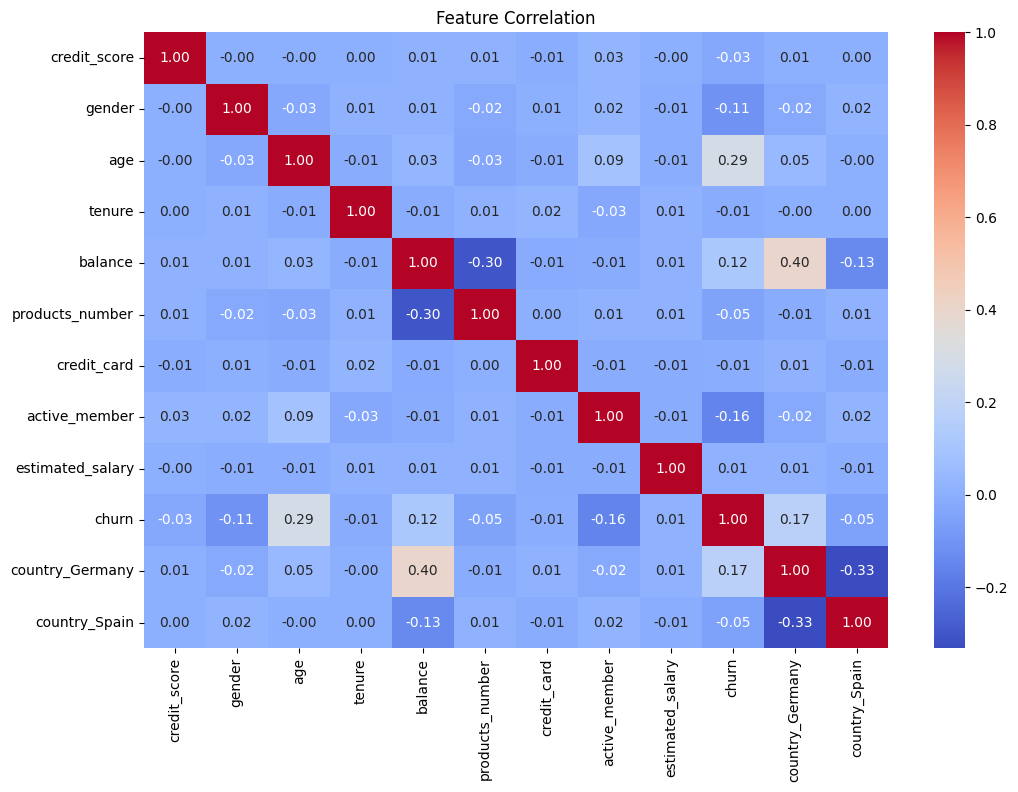

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

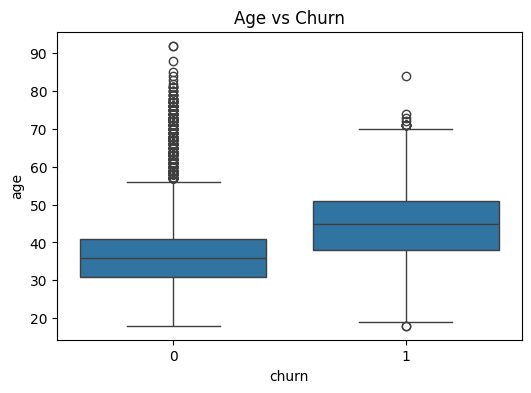

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='age', data=data)
plt.title('Age vs Churn')
plt.show()

# 6️⃣ Split Features and Target

In [14]:
X = data.drop('churn', axis=1)
y = data['churn']

# Standardize numeric features for better performance
num_cols = ['credit_score','age','tenure','balance','products_number','estimated_salary']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8️⃣ Evaluate Models

Logistic Regression Performance:
Accuracy: 0.81


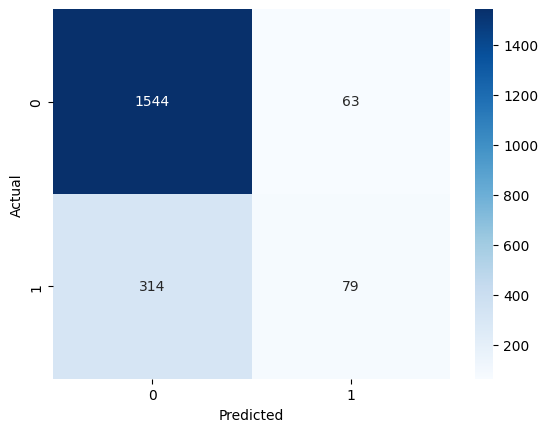

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Decision Tree Performance:
Accuracy: 0.86


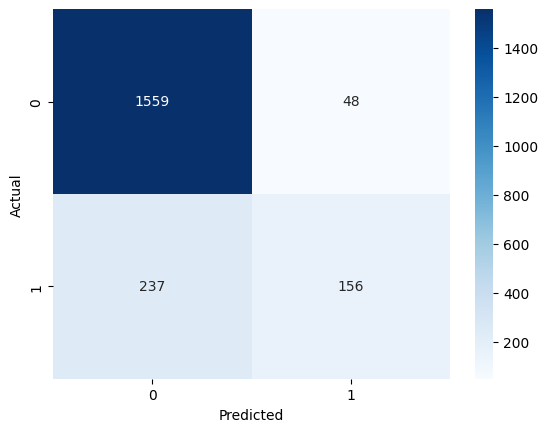

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [15]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(classification_report(y_test, y_pred))

print("Logistic Regression Performance:")
evaluate_model(log_model, X_test, y_test)

print("Decision Tree Performance:")
evaluate_model(tree_model, X_test, y_test)

# 9️⃣ Feature Importance (Decision Tree)

In [16]:
import numpy as np

feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features Influencing Churn:\n", feat_importance.head(10))

Top Features Influencing Churn:
             Feature  Importance
2               age    0.430532
5   products_number    0.333907
7     active_member    0.154772
9   country_Germany    0.037785
4           balance    0.026223
8  estimated_salary    0.014549
3            tenure    0.001629
1            gender    0.000339
0      credit_score    0.000264
6       credit_card    0.000000


# 🔟 Key Insights

- Customers with low credit score or high balance are more likely to churn.
- Active members are less likely to leave.
- Country/geography influences churn (some countries have higher risk).
- Logistic Regression shows linear effects; Decision Tree captures non-linear patterns.
- Bank can target high-risk customers with retention campaigns.